## 2. MLP Classification

#### 2.1

##### 2.1.1

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_path = '../../data/external/WineQT.csv'
df = pd.read_csv(data_path)

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


##### 2.1.2

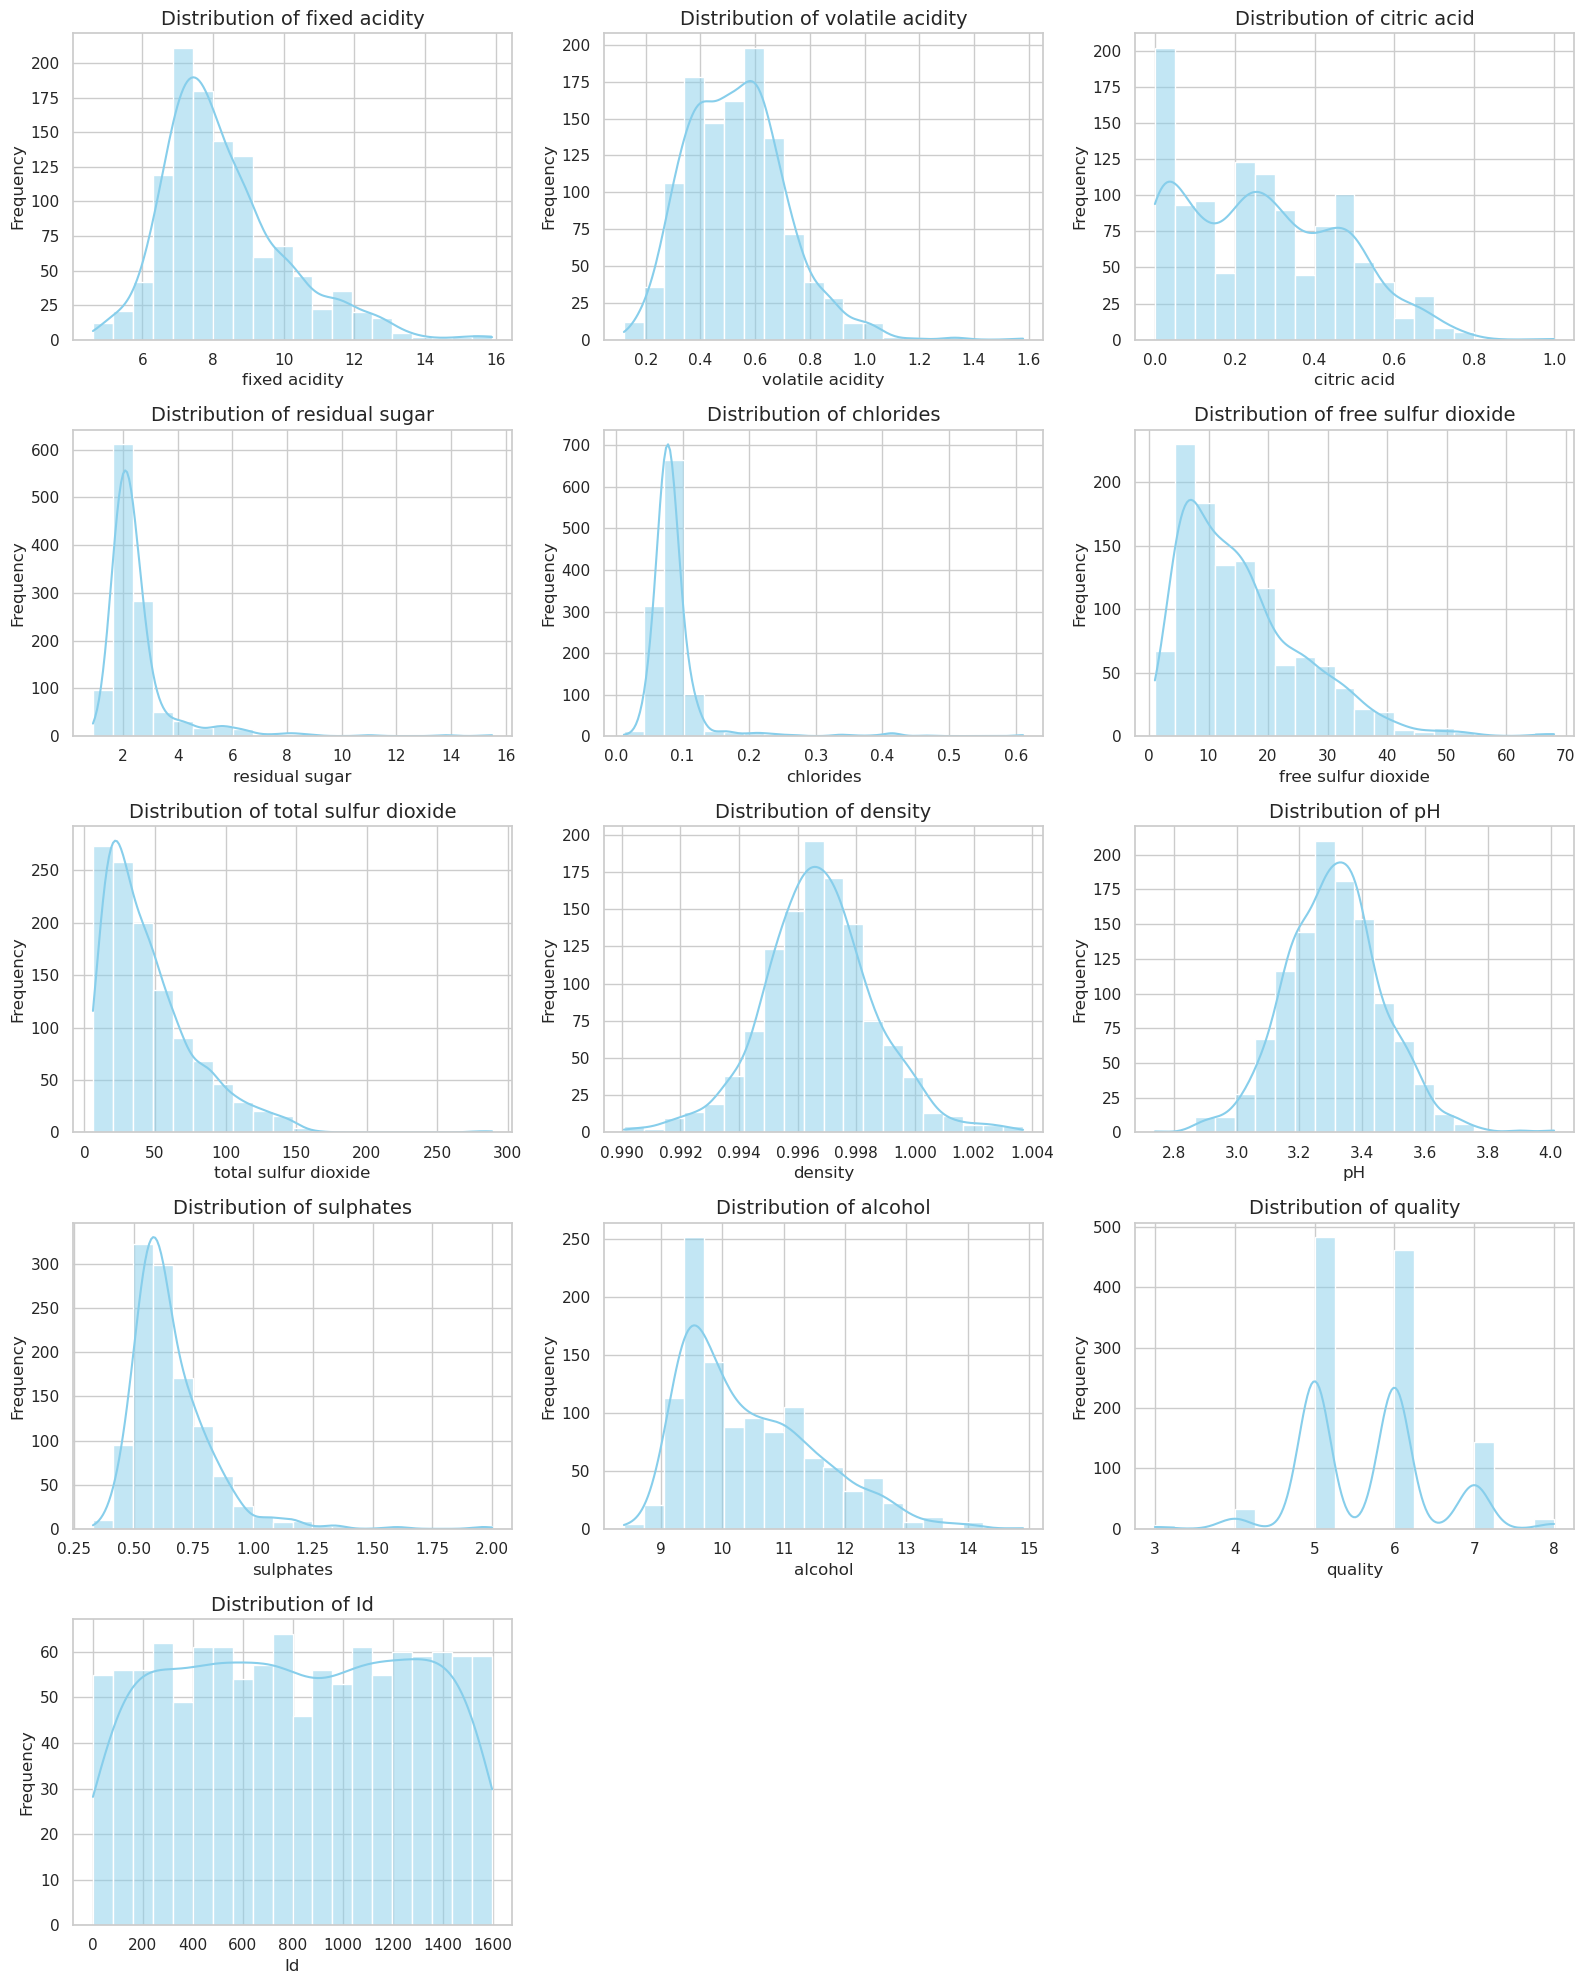

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style="whitegrid", palette="pastel")

num_columns = df.shape[1]  
plots_per_row = 3  #
num_rows = (num_columns + plots_per_row - 1) // plots_per_row  

plt.figure(figsize=(16, num_rows * 4))  

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, plots_per_row, i + 1) 
    sns.histplot(df[column], bins=20, kde=True, color='skyblue')  
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


##### 2.1.3

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))  
from models.MLP.MLP import MLP_SingleLabelClassifier,MLP_MultiLabelClassifier,MLP

import warnings
warnings.filterwarnings('ignore')

df.fillna(0, inplace=True)
df = df.sample(frac=1, random_state=42)

X = df.drop('quality', axis=1)
y = df['quality']

X.fillna(np.mean(X), inplace=True)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

scaler = StandardScaler()
X = scaler.fit_transform(X)

#### 2.5

In [12]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

num_classes = len(np.unique(y))

mlp = MLP_SingleLabelClassifier(input_size=X_train.shape[1], hidden_layers=[32, 64], output_size=num_classes,
          learning_rate=0.001, activation='tanh', optimizer='sgd',
          batch_size=32, epochs=100)

mlp.fit(X_train, y_train,validation=True, X_val = X_val, y_val = y_val)

y_train_pred = mlp.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

y_test_pred = mlp.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Training Data Metrics:\n  Accuracy: {train_accuracy}\n")
print(f"Test Data Metrics:\n  Accuracy: {test_accuracy}\n")
print(f"Training Data Classification Report:\n{train_classification_report}")
print(f"Test Data Classification Report:\n{test_classification_report}")
# print(f"Training Data Confusion Matrix:\n{train_confusion_matrix}")
# print(f"Test Data Confusion Matrix:\n{test_confusion_matrix}")

mlp.gradient_check(X_train, y_train)

Early stopping at epoch 34. Best validation loss: 1.0317
Training Data Metrics:
  Accuracy: 0.6794310722100656

Test Data Metrics:
  Accuracy: 0.6052631578947368

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      0.03      0.06        29
           2       0.72      0.80      0.76       389
           3       0.64      0.69      0.66       369
           4       0.66      0.49      0.56       110
           5       0.00      0.00      0.00        12

    accuracy                           0.68       914
   macro avg       0.42      0.34      0.34       914
weighted avg       0.66      0.68      0.66       914

Test Data Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.59      0.67      0.63        48
           3       0.63      0.60      0.62        53
       

#### 2.7

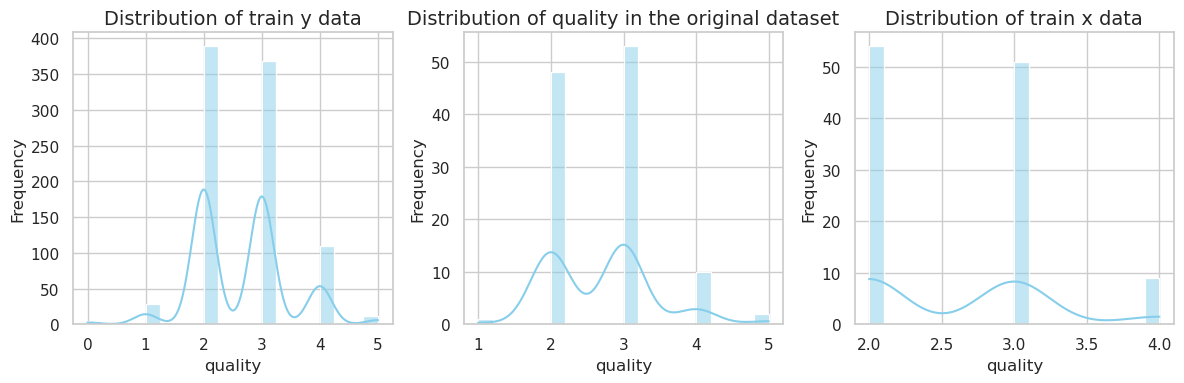

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(12,4) ) 

plt.subplot(1, 3, 2) 
sns.histplot(y_test, bins=20, kde=True, color='skyblue')  
plt.title(f'Distribution of quality in the original dataset', fontsize=14)
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 3, 3) 
sns.histplot(y_test_pred, bins=20, kde=True, color='skyblue')  
plt.title(f'Distribution of train x data', fontsize=14)
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 3, 1) 
sns.histplot(y_train, bins=20, kde=True, color='skyblue')  
plt.title(f'Distribution of train y data', fontsize=14)
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# num_classes = len(np.unique(y))

# mlp = MLP(input_size=X_train.shape[1], hidden_layers=[20, 20], output_size=num_classes, task_type='classifier',
#           learning_rate=0.01, activation='tanh', optimizer='mini_batch_gd',
#           batch_size=32, epochs=1000)

# mlp.fit(X_train, y_train,validation_split=0.2)

# y_train_pred = mlp.predict(X_train)

# train_accuracy = accuracy_score(y_train, y_train_pred)
# train_classification_report = classification_report(y_train, y_train_pred)
# train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

# y_test_pred = mlp.predict(X_test)

# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_classification_report = classification_report(y_test, y_test_pred)
# test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# print(f"Training Data Metrics:\n  Accuracy: {train_accuracy}\n")
# print(f"Test Data Metrics:\n  Accuracy: {test_accuracy}\n")
# print(f"Training Data Classification Report:\n{train_classification_report}")
# print(f"Test Data Classification Report:\n{test_classification_report}")
# # print(f"Training Data Confusion Matrix:\n{train_confusion_matrix}")
# # print(f"Test Data Confusion Matrix:\n{test_confusion_matrix}")

# mlp.gradient_check(X_train, y_train)

#### 2.6 Multi Label

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Load and preview the data
data_path = '../../data/external/advertisement.csv'
data_adv = pd.read_csv(data_path)

labels =set()
for i in range(len(data_adv)):
    data_labels = (data_adv.iloc[i]["labels"]).split()
    for j in data_labels:
        labels.add(j)
set_of_labels= np.array(list(sorted(labels)))
df_encoded = data_adv.__deepcopy__()
label_encoder = LabelEncoder()
columns=["gender","education","city","occupation","most bought item"]
for i in columns:
    df_encoded[i] = label_encoder.fit_transform(df_encoded[i])
X_df  =df_encoded.drop("labels",axis="columns")
Y_df_1 = data_adv["labels"]
Y_df  =pd.DataFrame()
for label in set_of_labels:
    Y_df[label] = Y_df_1.apply(lambda ele:1 if label in ele else 0)
    

from sklearn.preprocessing import StandardScaler
X_train , X_test, Y_train, Y_test = train_test_split(X_df,Y_df,test_size=0.25,random_state=42)
X_test, X_val , Y_test , Y_val = train_test_split(X_test,Y_test,test_size=0.5,random_state=42)
scaler  = StandardScaler()
scaler.fit(X_df)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
X_val = pd.DataFrame(scaler.transform(X_val))


##### Train

In [15]:
def hamming_score(y_true,y_pred):
    if(isinstance(y_true,pd.DataFrame)):
        y_true= y_true.to_numpy()
    if(isinstance(y_pred,pd.DataFrame)):
        y_pred = y_pred.to_numpy()
    x=np.array([])
    x2=np.array([])
    for i in range(len(y_true)):
        x = np.hstack((x,y_true[i]))
        x2 = np.hstack((x2,y_pred[i]))
    return accuracy_score(x,x2)
def f1_score_hamming(y_true,y_pred):
    if(isinstance(y_true,pd.DataFrame)):
        y_true= y_true.to_numpy()
    if(isinstance(y_pred,pd.DataFrame)):
        y_pred = y_pred.to_numpy()
    x=np.array([])
    x2=np.array([])
    for i in range(len(y_true)):
        x = np.hstack((x,y_true[i]))
        x2 = np.hstack((x2,y_pred[i]))
    return f1_score(x,x2,average='macro',zero_division=0)
def precision_hamming(y_true,y_pred):
    if(isinstance(y_true,pd.DataFrame)):
        y_true= y_true.to_numpy()
    if(isinstance(y_pred,pd.DataFrame)):
        y_pred = y_pred.to_numpy()
    x=np.array([])
    x2=np.array([])
    for i in range(len(y_true)):
        x = np.hstack((x,y_true[i]))
        x2 = np.hstack((x2,y_pred[i]))
    return precision_score(x,x2,average='macro',zero_division=0)
def recall_hamming(y_true,y_pred):
    if(isinstance(y_true,pd.DataFrame)):
        y_true= y_true.to_numpy()
    if(isinstance(y_pred,pd.DataFrame)):
        y_pred = y_pred.to_numpy()
    x=np.array([])
    x2=np.array([])
    for i in range(len(y_true)):
        x = np.hstack((x,y_true[i]))
        x2 = np.hstack((x2,y_pred[i]))
    return recall_score(x,x2,average='macro',zero_division=0)


In [16]:
import wandb
wandb.login()


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: mjolnir65 (mjolnir65-iiit-hyderabad). Use `wandb login --relogin` to force relogin


True

In [17]:
optimisers = ["sgd","batch_gd","mini_gd"]
activation_funcs = ["relu","tanh","sigmoid"]
batch_size = [8,32]
epochs = [100,1000,1500,3000]
learning = [0.001,0.002,0.004]
for optimiser in optimisers:
    for acti in activation_funcs:
        run = wandb.init(project="MLP-Classifier-MultiLabel")
        run.name = "Optimiser = {}, Activation Function = {} ".format(optimiser,acti)
        run.save()
        for rate in learning: 
            for num_epoch in epochs:
                if(optimiser == "mini_gd"):
                    for batch in batch_size:
                        model = MLP_multilabel(hidden_neurons=[10],num_hid_layers=1,epochs=num_epoch,learning_rate = rate,activation=acti,optimizer=optimiser,batch_size=batch)
                        model.train(X_train,Y_train)
                        Y_pred = model.predict(X_val)
                        accuracy_val  = hamming_score(Y_val,Y_pred)
                        Y_pred = model.predict(X_test)
                        accuracy_test  = hamming_score(Y_test,Y_pred)
                        wandb.log({
                            "num_epochs" : num_epoch,
                            "learning rate": rate,
                            "batch_size" : batch,
                            "train_loss" : model.train_loss,
                            "acc_val" : accuracy_val,
                            "acc_test" : accuracy_test
                        })
                else:
                    model = MLP_multilabel(hidden_neurons=[10],num_hid_layers=1,epochs=num_epoch,learning_rate = rate,activation=acti,optimizer=optimiser)
                    model.train(X_train,Y_train)
                    Y_pred = model.predict(X_val)
                    accuracy_val  = hamming_score(Y_val,Y_pred)
                    Y_pred = model.predict(X_test)
                    accuracy_test  = hamming_score(Y_test,Y_pred)
                    wandb.log({
                        "num_epochs" : num_epoch,
                        "learning rate": rate,
                        "train_loss" : model.train_loss,
                        "acc_val" : accuracy_val,
                        "acc_test" : accuracy_test
                    })
        wandb.finish()

wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


KeyboardInterrupt: 

In [ ]:
import pandas as pd

def create_comparison_csv(y_true, y_pred, output_file, set_name="train"):

    true_label_cols = [f"true_label_{i}" for i in range(y_true.shape[1])]
    pred_label_cols = [f"pred_label_{i}" for i in range(y_true.shape[1])]
    
    df_true = pd.DataFrame(y_true, columns=true_label_cols)
    df_pred = pd.DataFrame(y_pred, columns=pred_label_cols)
    
    df_combined = pd.concat([df_true, df_pred], axis=1)
    
    for i in range(y_true.shape[1]):
        df_combined[f"match_{i}"] = (df_combined[f"true_label_{i}"] == df_combined[f"pred_label_{i}"]).astype(int)
    
    df_combined["row_accuracy"] = df_combined[[f"match_{i}" for i in range(y_true.shape[1])]].mean(axis=1)
    
    df_combined.to_csv(output_file, index=True, index_label="sample_id")
    
    print(f"\nSummary Statistics for {set_name} set:")
    print("-" * 50)
    
    for i in range(y_true.shape[1]):
        accuracy = (df_combined[f"match_{i}"].sum() / len(df_combined)) * 100
        print(f"Class {i} accuracy: {accuracy:.2f}%")
    
    print(f"Overall accuracy: {df_combined['row_accuracy'].mean()*100:.2f}%")
    
    return df_combined

train_comparison = create_comparison_csv(y_train, y_train_pred, "train_predictions.csv", "training")
test_comparison = create_comparison_csv(y_test, y_test_pred, "test_predictions.csv", "test")

def print_confusing_examples(comparison_df, n_examples=10):
    print("\nMost Confusing Examples (lowest row accuracy):")
    print("-" * 50)
    
    confusing_examples = comparison_df.nsmallest(n_examples, "row_accuracy")
    
    for idx, row in confusing_examples.iterrows():
        print(f"\nSample {idx}:")
        n_classes = len([col for col in comparison_df.columns if col.startswith("true_label")])
        
        print("True labels:  ", end="")
        print([row[f"true_label_{i}"] for i in range(n_classes)])
        
        print("Predictions: ", end="")
        print([row[f"pred_label_{i}"] for i in range(n_classes)])
        
        print(f"Row accuracy: {row['row_accuracy']:.2f}")

print("\nAnalyzing Training Set Confusing Examples:")
print_confusing_examples(train_comparison)

print("\nAnalyzing Test Set Confusing Examples:")
print_confusing_examples(test_comparison)

def print_label_distribution(y_data, set_name):
    print(f"\nLabel Distribution for {set_name} set:")
    print("-" * 50)
    
    n_samples = len(y_data)
    n_classes = y_data.shape[1]
    
    for i in range(n_classes):
        positive_count = np.sum(y_data[:, i] == 1)
        negative_count = np.sum(y_data[:, i] == 0)
        
        print(f"\nClass {i}:")
        print(f"Positive samples: {positive_count} ({(positive_count/n_samples)*100:.2f}%)")
        print(f"Negative samples: {negative_count} ({(negative_count/n_samples)*100:.2f}%)")

print_label_distribution(y_train, "Training")
print_label_distribution(y_test, "Test")